# Problem 1

In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [23]:
raw_data = np.load('./data/p1/X.npy')
raw_data = pd.DataFrame(raw_data)

data = np.log2(raw_data + 1)

scaler = StandardScaler()
raw_data_scaled = scaler.fit_transform(raw_data)
data_scaled = scaler.fit_transform(data)

In [24]:
raw_pca = PCA()
raw_pca.fit(raw_data_scaled)
raw_variance_explained_first_pc = raw_pca.explained_variance_ratio_[0]
cumulative_raw_variance = np.cumsum(raw_pca.explained_variance_ratio_)
num_pcs_85_variance_raw = np.argmax(cumulative_raw_variance >= 0.85) + 1

pca = PCA()
pca.fit(data_scaled)
variance_explained_first_pc = pca.explained_variance_ratio_[0]
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_pcs_85_variance = np.argmax(cumulative_variance >= 0.85) + 1

In [25]:
print(f'Percentage of variance explained by the first principal component (raw_data): {raw_variance_explained_first_pc * 100}%')
print(f'Number of principal components needed to explain 85% of the variance (raw_data): {num_pcs_85_variance_raw}')

print(f'Percentage of variance explained by the first principal component (processed data): {variance_explained_first_pc * 100}%')
print(f'Number of principal components needed to explain 85% of the variance (processed data): {num_pcs_85_variance}')

Percentage of variance explained by the first principal component (raw_data): 2.3469436790631426%
Number of principal components needed to explain 85% of the variance (raw_data): 363
Percentage of variance explained by the first principal component (processed data): 5.999999074521395%
Number of principal components needed to explain 85% of the variance (processed data): 389


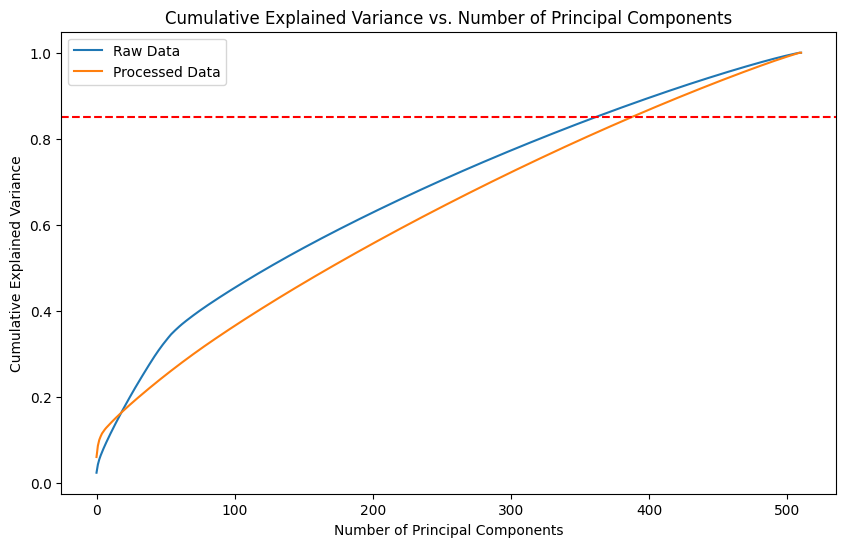

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_raw_variance, label='Raw Data')
plt.plot(cumulative_variance, label='Processed Data')
plt.axhline(y=0.85, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

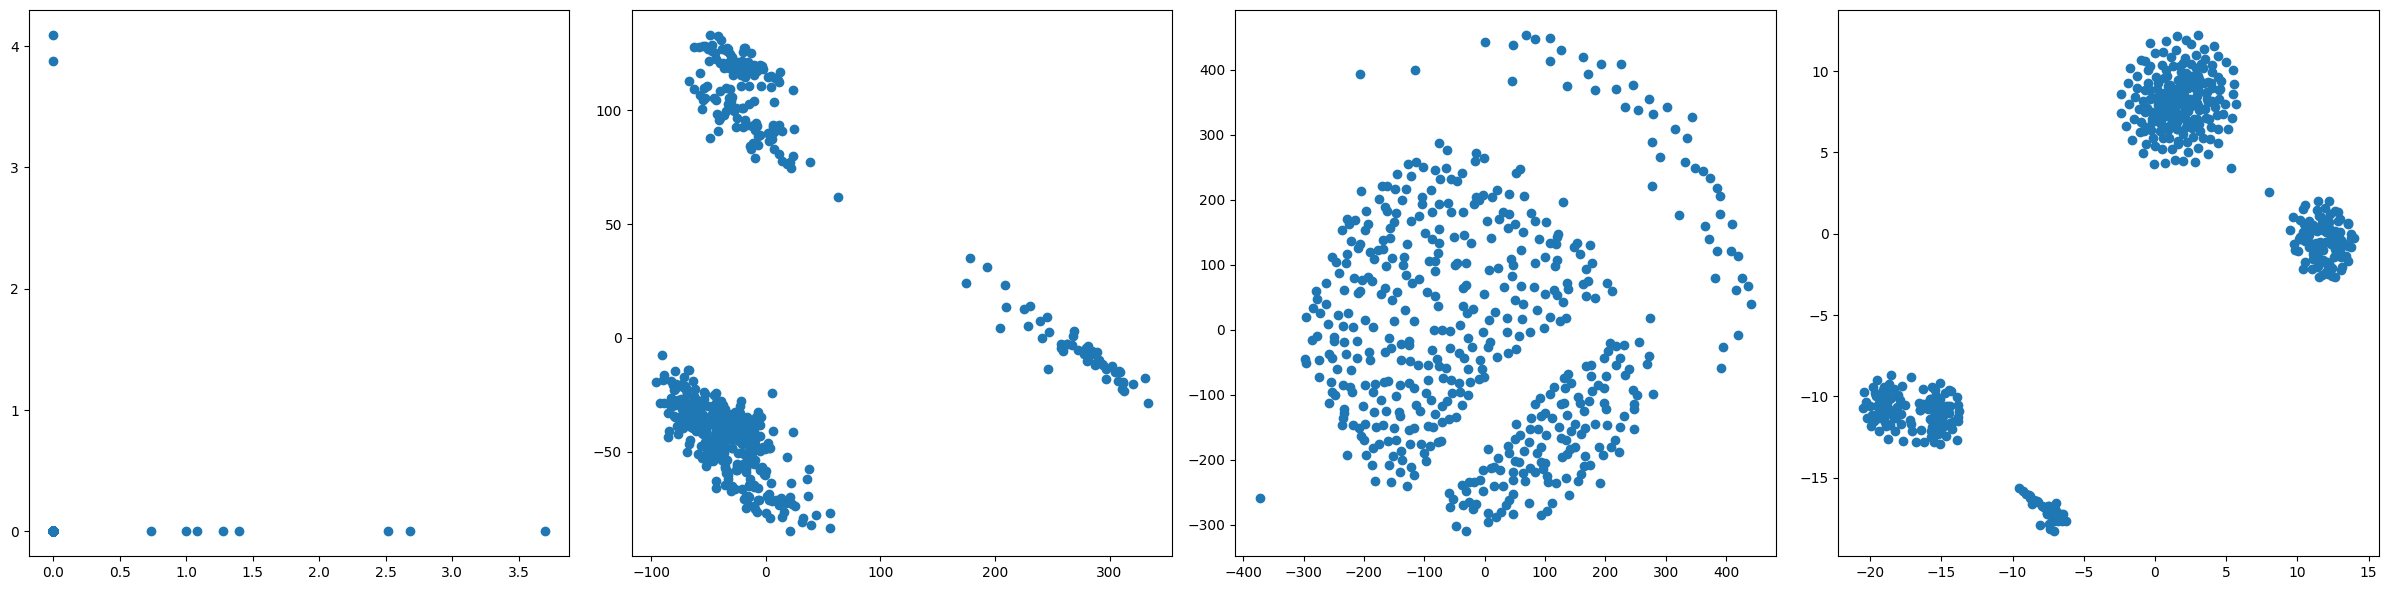

In [27]:
number_components = 2

pca = PCA(n_components = number_components)
data_pca_transformed = pca.fit_transform(data)

mds = MDS(n_components = number_components)
data_mds_transformed = mds.fit_transform(data)

tsne = TSNE(n_components = number_components)
data_tsne_transformed = tsne.fit_transform(data)

plt.figure(figsize=(24,6))
plt.subplot(1, 4, 1)
plt.scatter(data[0], data[1])
plt.subplot(1, 4, 2)
plt.scatter(data_pca_transformed[:, 0], data_pca_transformed[:, 1])
plt.subplot(1, 4, 3)
plt.scatter(data_mds_transformed[:, 0], data_mds_transformed[:, 1])
plt.subplot(1, 4, 4)
plt.scatter(data_tsne_transformed[:, 1], data_tsne_transformed[:, 0])
plt.tight_layout()
plt.show()

---

In [28]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
raw_data = np.load('./data/p1/X.npy')
raw_data = pd.DataFrame(raw_data)

data = np.log2(raw_data + 1)

scaler = StandardScaler()
raw_data_scaled = scaler.fit_transform(raw_data)
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components = 50)
data_pca = pca.fit_transform(data_scaled)

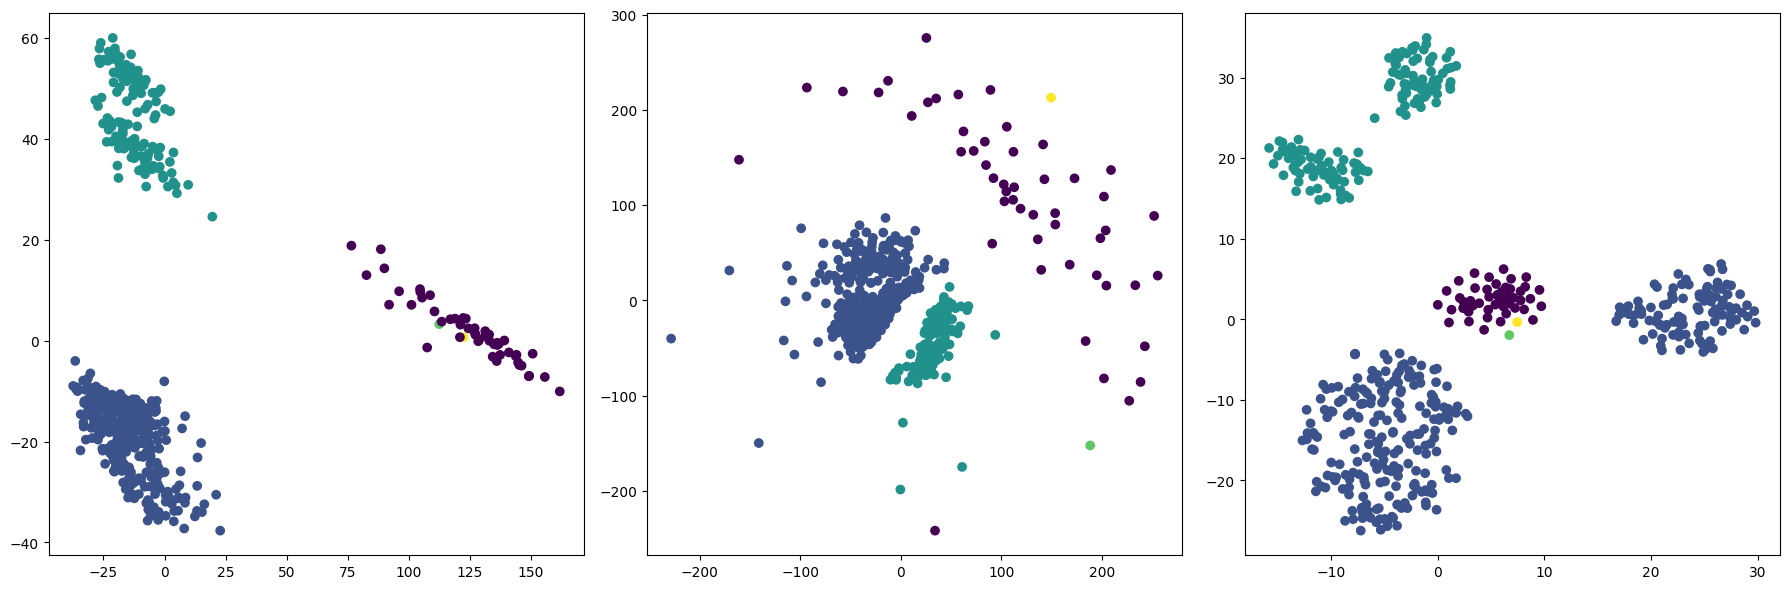

In [30]:
number_components = 2

pca = PCA(n_components = number_components, random_state=42)
data_pca_transformed = pca.fit_transform(data_pca)

mds = MDS(n_components = number_components, random_state=42)
data_mds_transformed = mds.fit_transform(data_pca)

tsne = TSNE(n_components = number_components, random_state=42)
data_tsne_transformed = tsne.fit_transform(data_pca)

kmeans = KMeans(n_clusters = 5)
cluster_labels = kmeans.fit_predict(data_pca)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(data_pca_transformed[:, 0], data_pca_transformed[:, 1], c = cluster_labels)
plt.subplot(1, 3, 2)
plt.scatter(data_mds_transformed[:, 0], data_mds_transformed[:, 1], c = cluster_labels)
plt.subplot(1, 3, 3)
plt.scatter(data_tsne_transformed[:, 0], data_tsne_transformed[:, 1], c = cluster_labels)
plt.tight_layout()
plt.show()

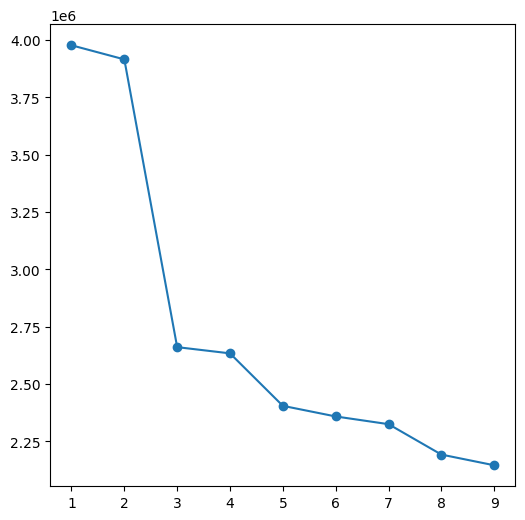

In [31]:
inertia_values = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca) 
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.show()

In [32]:
optimal_cluster = 3
kmeans = KMeans(n_clusters = optimal_cluster)
kmeans.fit(data)
criterion_value = kmeans.inertia_
print(f'K-Means clustering criterion at k = {optimal_cluster}: {criterion_value}')

K-Means clustering criterion at k = 3: 29370706.62659026


--- 

In [33]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
raw_data = np.load('./data/p1/X.npy')
raw_data = pd.DataFrame(raw_data)

data = np.log2(raw_data + 1)

scaler = StandardScaler()
raw_data_scaled = scaler.fit_transform(raw_data)
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components = 50)
data_pca = pca.fit_transform(data_scaled)

In [35]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data)

labels = kmeans.labels_

cluster_means = []
for cluster in range(optimal_k):
    cluster_points = data[labels == cluster]
    cluster_mean = np.mean(cluster_points, axis=0)
    cluster_means.append(cluster_mean)

cluster_means = np.array(cluster_means)
print("Cluster means (in original dimensions):")
print(cluster_means)


Cluster means (in original dimensions):
[[0.03135179 0.01736553 6.13012428 ... 0.         0.         0.        ]
 [0.         0.         8.24989628 ... 0.         0.         0.        ]
 [0.         0.         3.08567973 ... 0.         0.         0.        ]]


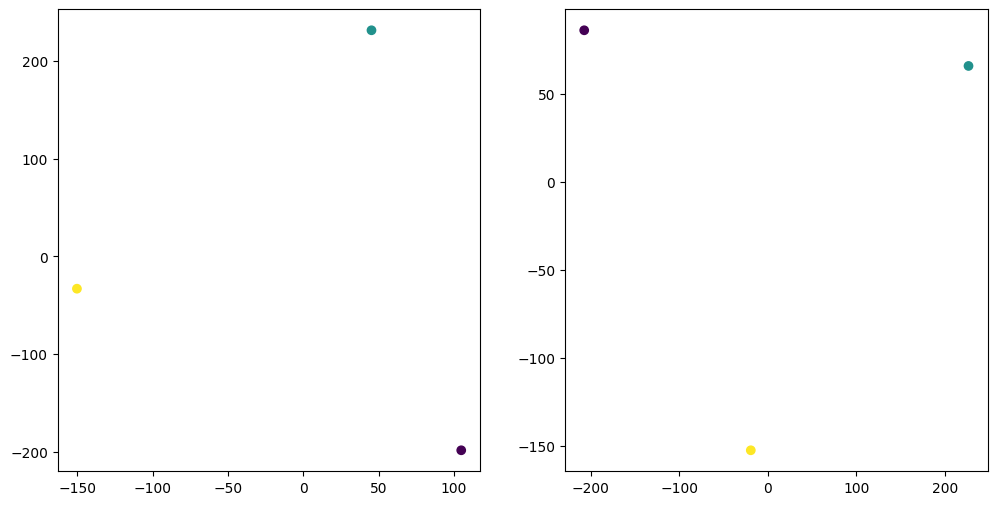

In [36]:
mds = MDS(n_components=2)
mds_transformed = mds.fit_transform(cluster_means)

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(cluster_means)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c=range(optimal_k), cmap='viridis', marker='o')
plt.subplot(1, 2, 2)
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=range(optimal_k), cmap='viridis', marker='o')
plt.show()


---

In [37]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [38]:
raw_data = np.load('./data/p1/X.npy')
raw_data = pd.DataFrame(raw_data)

scaler = StandardScaler()
raw_data_scaled = scaler.fit_transform(raw_data)

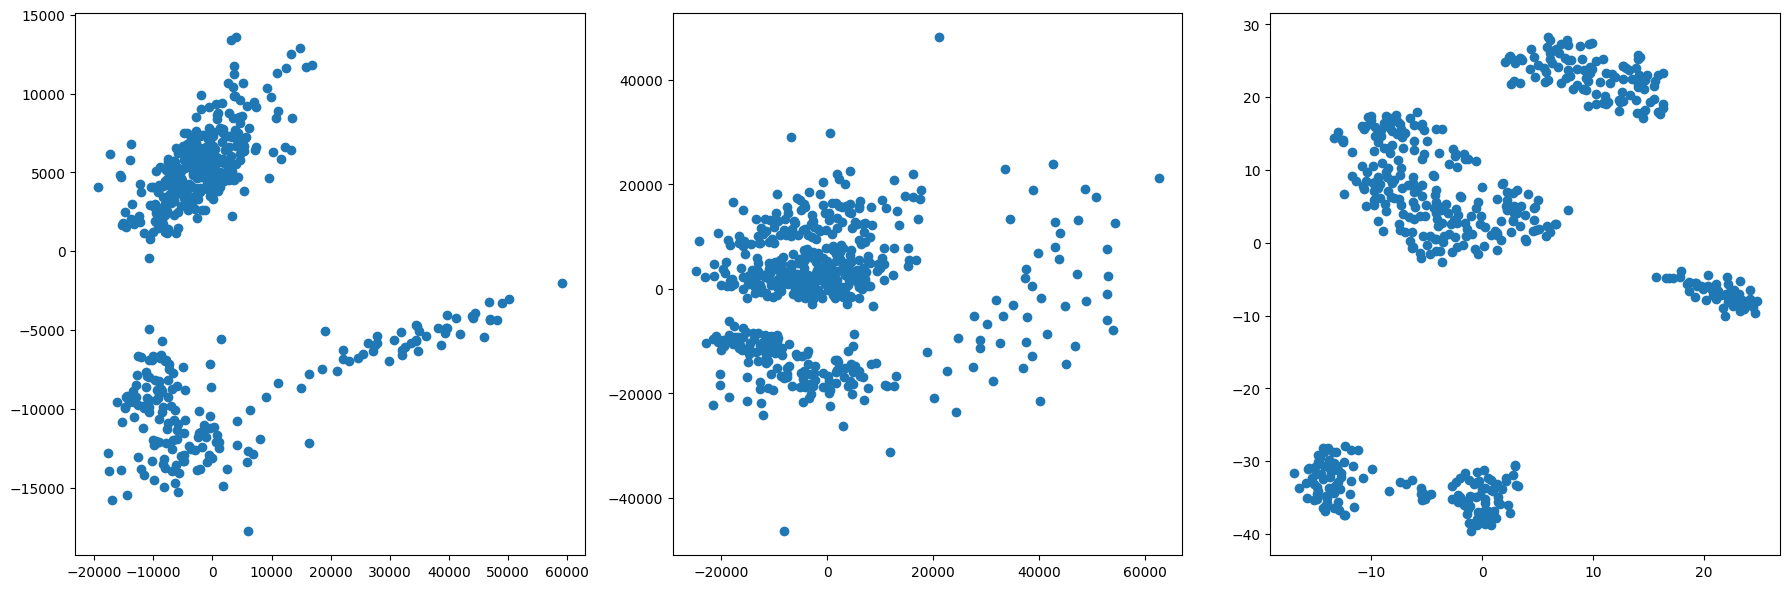

In [39]:
number_components = 2

pca = PCA(n_components = number_components, random_state=42)
data_pca_transformed = pca.fit_transform(raw_data)

mds = MDS(n_components = number_components, random_state=42)
data_mds_transformed = mds.fit_transform(raw_data)

tsne = TSNE(n_components = number_components, random_state=42)
data_tsne_transformed = tsne.fit_transform(raw_data)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(data_pca_transformed[:, 0], data_pca_transformed[:, 1])
plt.subplot(1, 3, 2)
plt.scatter(data_mds_transformed[:, 0], data_mds_transformed[:, 1])
plt.subplot(1, 3, 3)
plt.scatter(data_tsne_transformed[:, 0], data_tsne_transformed[:, 1])
plt.tight_layout()
plt.show()

# Problem 2

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
raw_data = np.load('./data/p2_unsupervised/X.npy')
raw_data = pd.DataFrame(raw_data)

data = np.log2(raw_data+1)

In [14]:
data[0].max()

np.float64(5.972169178513185)

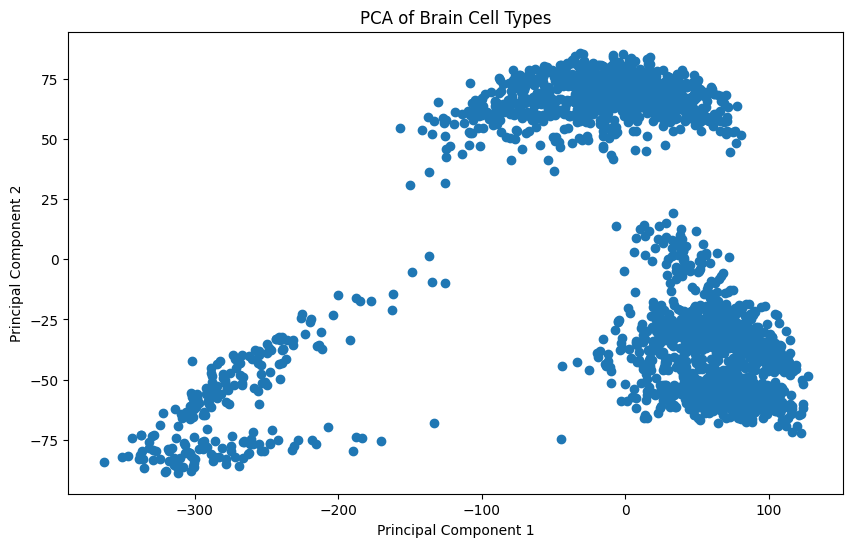

In [15]:
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Brain Cell Types')
plt.show()

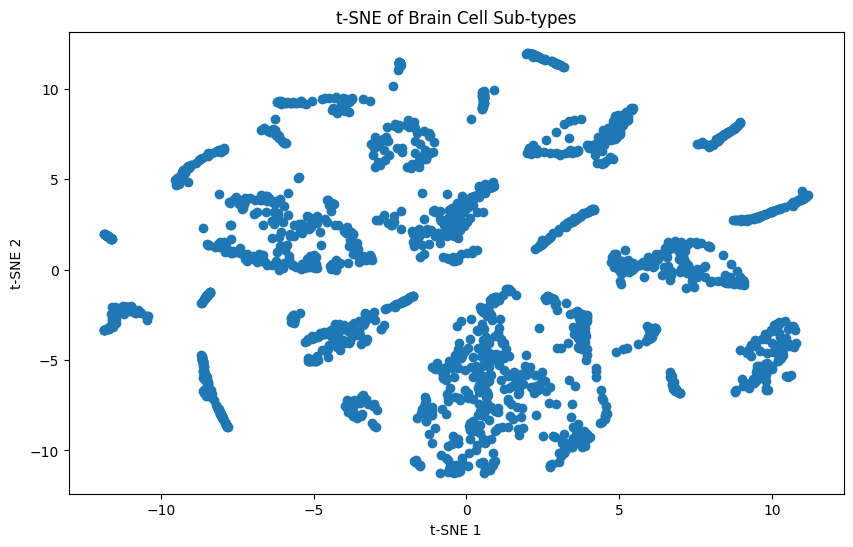

In [16]:
tsne = TSNE(n_components=2, perplexity=30, max_iter=300)
data_tsne = tsne.fit_transform(data_pca)

plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Brain Cell Sub-types')
plt.show()

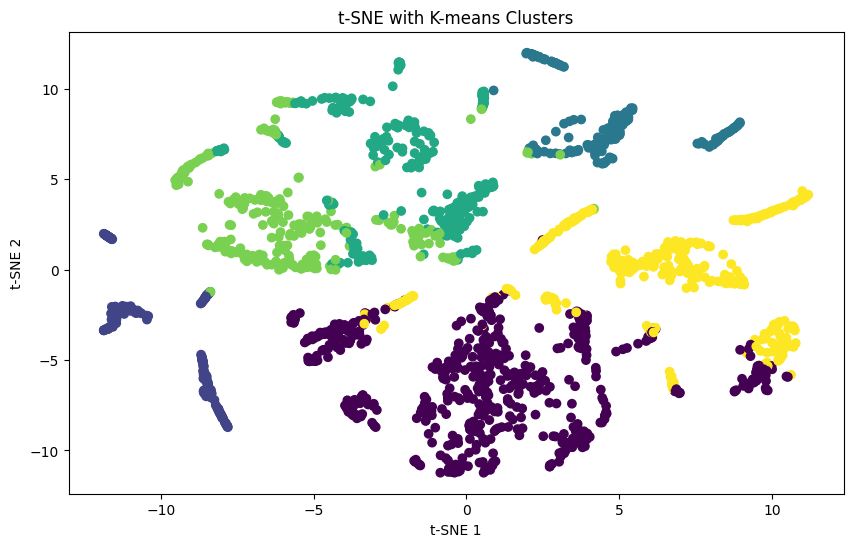

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(data_pca)

plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE with K-means Clusters')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(raw_data, clusters, test_size=0.2, random_state=42)

log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', multi_class='ovr')
log_reg.fit(X_train, y_train)

val_score = log_reg.score(X_val, y_val)
print(f'Validation Score: {val_score}')

Validation Score: 0.9377880184331797


In [19]:
# Get the coefficients
coefficients = np.abs(log_reg.coef_).max(axis=0)  # Use max absolute value over classes
top_features_indices = np.argsort(coefficients)[-100:]

# Get the selected features
selected_features = raw_data.columns[top_features_indices]
print(f'Selected Features: {selected_features}')

Selected Features: Index([ 8511,  3096, 25326, 32312, 38467, 35129, 41385,  4369, 40481,  4394,
       40087,  3526,  8579,  4688,  4356, 34454, 37104, 42199,  3539, 40519,
       34462, 40981, 45082, 37403, 41899, 40043, 43620,  7077, 40496, 34455,
       34953,  4300, 43570,  3542,  3320, 38466,  5510, 41265, 34890, 34844,
       39862,  3138, 37743, 44772,  3954, 43520, 41502,  5702, 38413, 41679,
        4368,  6007, 41531,  9356, 31896,  5551, 32005, 34789,  8472, 34314,
       44773, 36764,  8634, 41846, 40279, 34372,  3486, 42940, 34463,  3501,
        4390,  7896,  5341,  7307,  7288, 23881, 42788, 24224, 39674, 43629,
       24483,  5250, 25658, 37473,  5983,  2791, 40094, 37942, 40470, 39861,
        8283, 41848,  8720, 37844, 40964,  8586, 32057, 23490, 38468,  5730],
      dtype='int64')


In [20]:
# Load the evaluation data
raw_eval_train_data = np.load('./data/p2_evaluation/X_train.npy')
raw_eval_test_data = np.load('./data/p2_evaluation/X_test.npy')
eval_train_labels = np.load('./data/p2_evaluation/y_train.npy')
eval_test_labels = np.load('./data/p2_evaluation/y_test.npy')

eval_train_data = np.log2(raw_eval_train_data+1)
eval_test_data = np.log2(raw_eval_test_data+1)

# Select the features from the evaluation data
eval_train_data_selected = eval_train_data[:, top_features_indices]
eval_test_data_selected = eval_test_data[:, top_features_indices]

# Train logistic regression model on evaluation data
log_reg_eval = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', multi_class='ovr')
log_reg_eval.fit(eval_train_data_selected, eval_train_labels)

# Evaluate the model on test data
test_score = log_reg_eval.score(eval_test_data_selected, eval_test_labels)
print(f'Test Score: {test_score}')

Test Score: 0.894404332129964


In [21]:
# Select random features
random_features_indices = np.random.choice(raw_data.columns, 100, replace=False)

# Select high-variance features
variances = raw_data.var()
high_variance_features_indices = variances.nlargest(100).index

# Evaluate random features
eval_train_data_random = eval_train_data[:, random_features_indices]
eval_test_data_random = eval_test_data[:, random_features_indices]

log_reg_random = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', multi_class='ovr')
log_reg_random.fit(eval_train_data_random, eval_train_labels)
random_score = log_reg_random.score(eval_test_data_random, eval_test_labels)
print(f'Random Features Score: {random_score}')

# Evaluate high-variance features
eval_train_data_high_variance = eval_train_data[:, high_variance_features_indices]
eval_test_data_high_variance = eval_test_data[:, high_variance_features_indices]

log_reg_high_variance = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', multi_class='ovr')
log_reg_high_variance.fit(eval_train_data_high_variance, eval_train_labels)
high_variance_score = log_reg_high_variance.score(eval_test_data_high_variance, eval_test_labels)
print(f'High Variance Features Score: {high_variance_score}')

Random Features Score: 0.3907942238267148
High Variance Features Score: 0.894404332129964


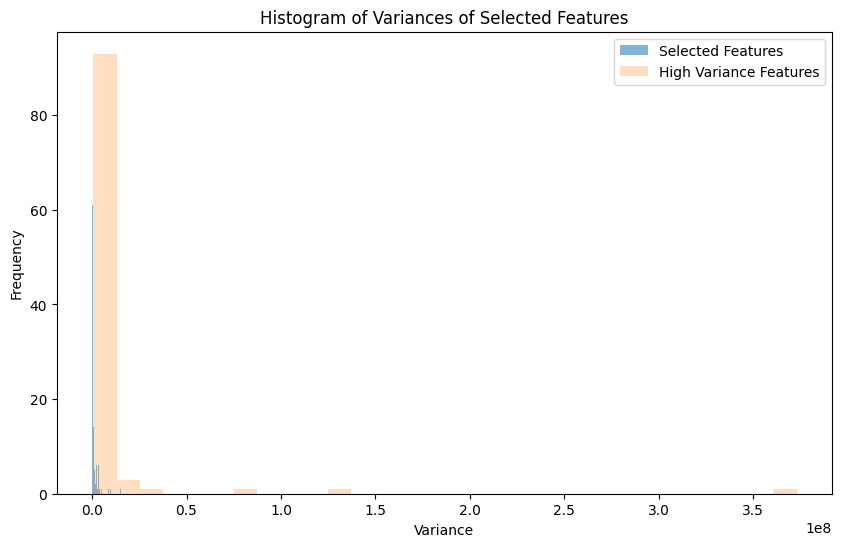

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(variances[top_features_indices], bins=30, alpha=0.55, label='Selected Features')
plt.hist(variances[high_variance_features_indices], bins=30, alpha=0.25, label='High Variance Features')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Histogram of Variances of Selected Features')
plt.legend()
plt.show()

# Problem 3

In [40]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [41]:
raw_data = np.load('./data/p1/X.npy')
raw_data = pd.DataFrame(raw_data)

data = np.log2(raw_data + 1)

scaler = StandardScaler()
raw_data_scaled = scaler.fit_transform(raw_data)
data_scaled = scaler.fit_transform(data)

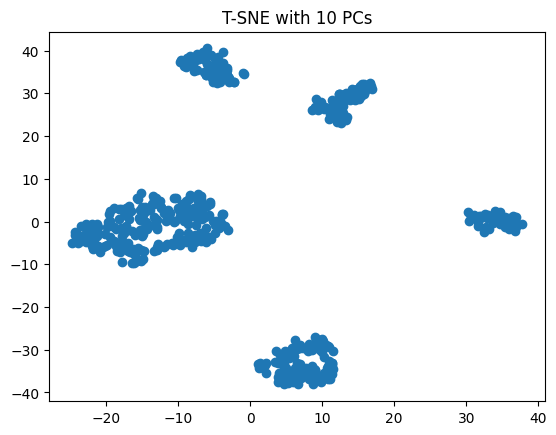

In [42]:
pca_10 = PCA(n_components=10)
data_10 = pca_10.fit_transform(data_scaled)
tsne_10 = TSNE()
data_tsne_10 = tsne_10.fit_transform(data_10)

plt.scatter(data_tsne_10[:, 0], data_tsne_10[:, 1])
plt.title("T-SNE with 10 PCs")
plt.show()

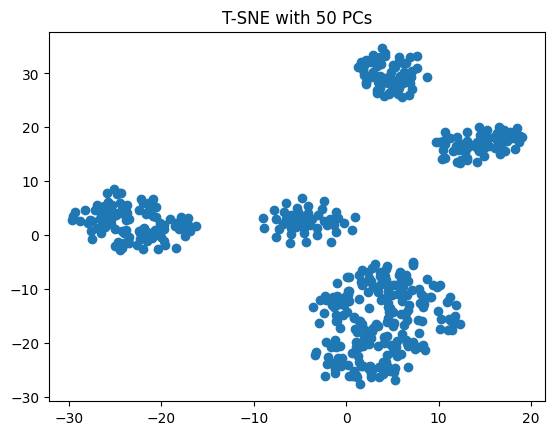

In [43]:
pca_50 = PCA(n_components=50)
data_50 = pca_50.fit_transform(data_scaled)
tsne_50 = TSNE()
data_tsne_50 = tsne_50.fit_transform(data_50)

plt.scatter(data_tsne_50[:, 0], data_tsne_50[:, 1])
plt.title("T-SNE with 50 PCs")
plt.show()

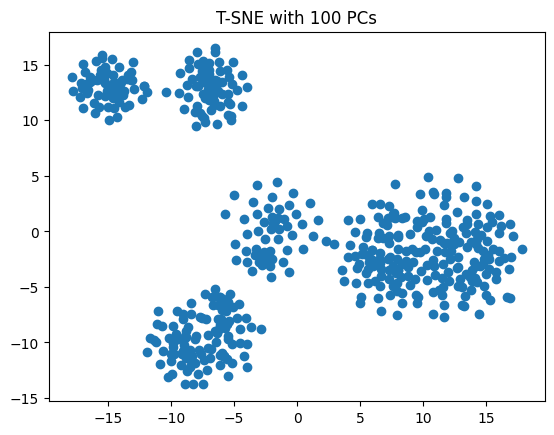

In [44]:
pca_100 = PCA(n_components=100)
data_100 = pca_100.fit_transform(data_scaled)
tsne_100 = TSNE()
data_tsne_100 = tsne_100.fit_transform(data_100)

plt.scatter(data_tsne_100[:, 0], data_tsne_100[:, 1])
plt.title("T-SNE with 100 PCs")
plt.show()

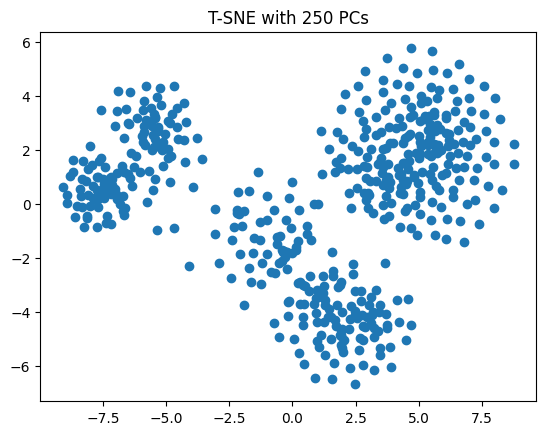

In [45]:
pca_250 = PCA(n_components=250)
data_250 = pca_250.fit_transform(data_scaled)
tsne_250 = TSNE()
data_tsne_250 = tsne_250.fit_transform(data_250)

plt.scatter(data_tsne_250[:, 0], data_tsne_250[:, 1])
plt.title("T-SNE with 250 PCs")
plt.show()

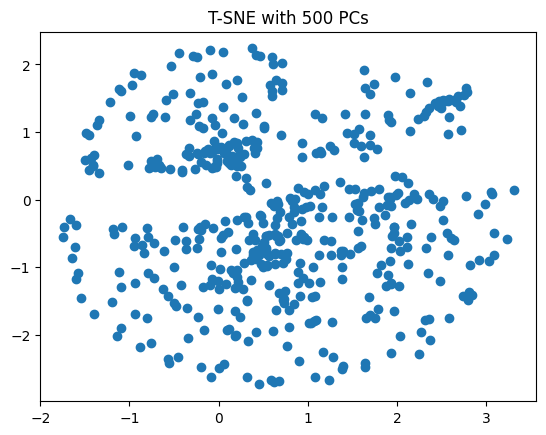

In [46]:
pca_500 = PCA(n_components=500)
data_500 = pca_500.fit_transform(data_scaled)
tsne_500 = TSNE()
data_tsne_500 = tsne_500.fit_transform(data_500)

plt.scatter(data_tsne_500[:, 0], data_tsne_500[:, 1])
plt.title("T-SNE with 500 PCs")
plt.show()

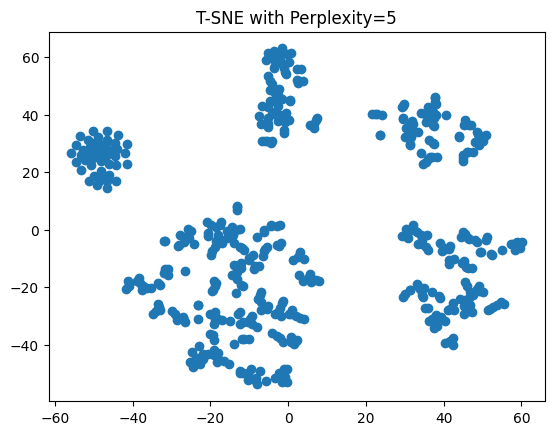

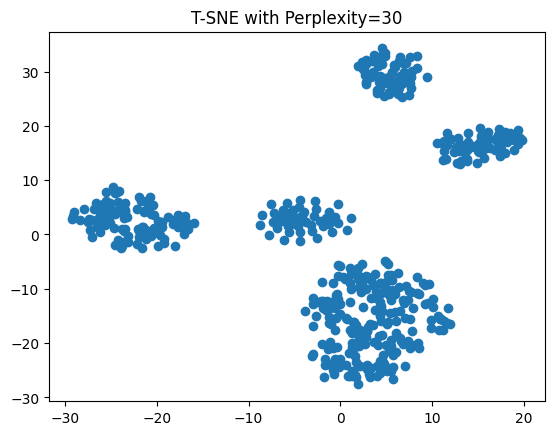

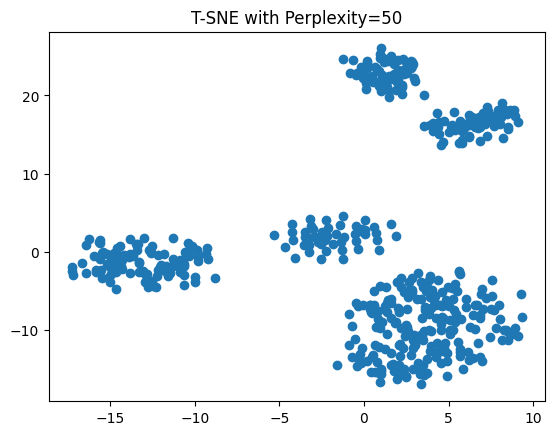

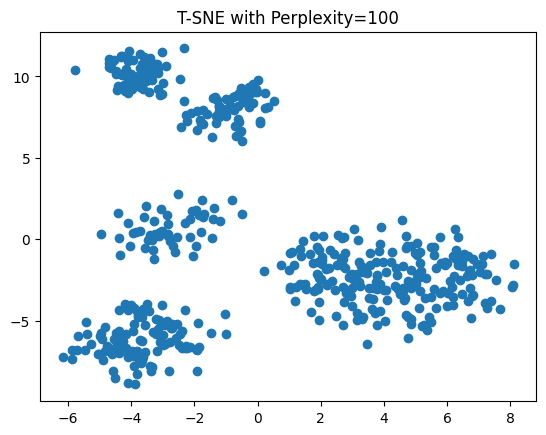

In [47]:
for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(perplexity=perplexity)
    data_tsne = tsne.fit_transform(data_50)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
    plt.title(f"T-SNE with Perplexity={perplexity}")
    plt.show()

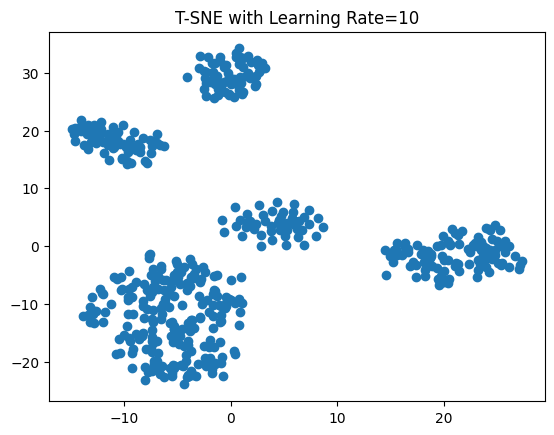

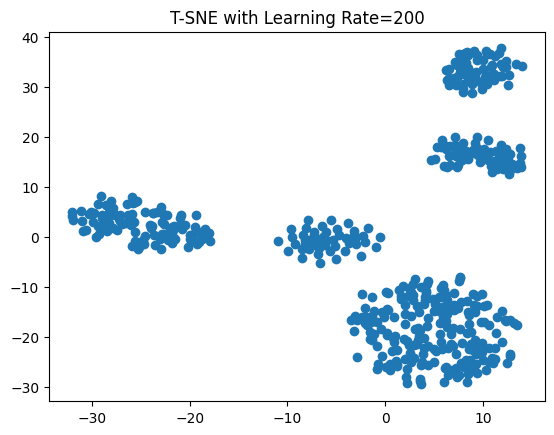

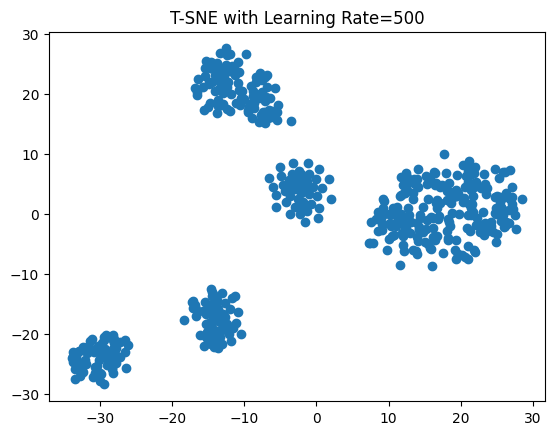

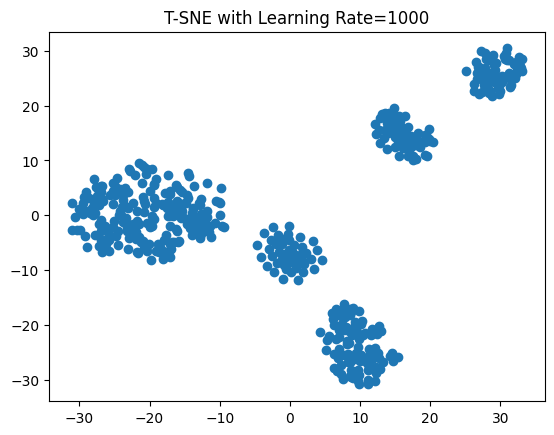

In [48]:
for lr in [10, 200, 500, 1000]:
    tsne = TSNE(learning_rate=lr)
    data_tsne = tsne.fit_transform(data_50)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
    plt.title(f"T-SNE with Learning Rate={lr}")
    plt.show()

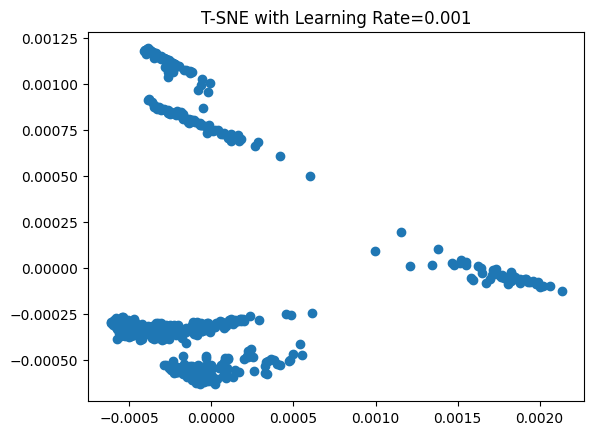

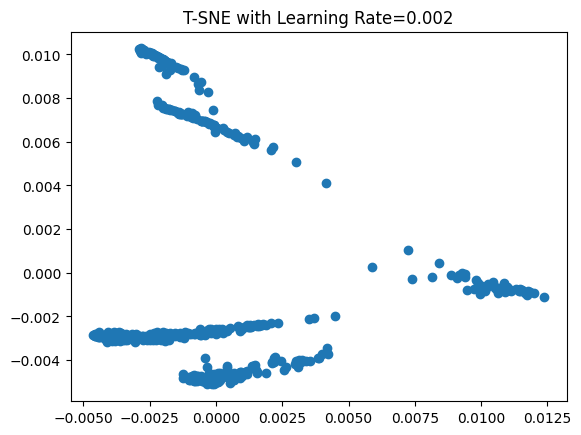

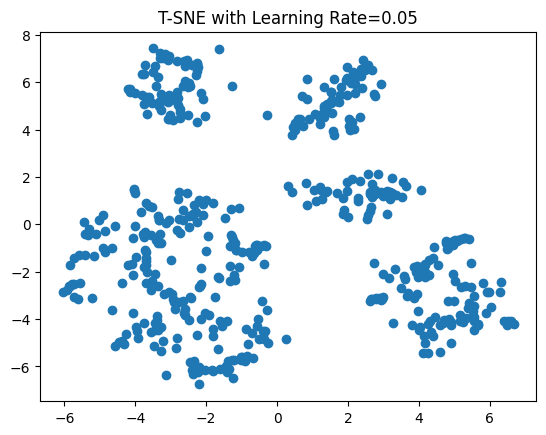

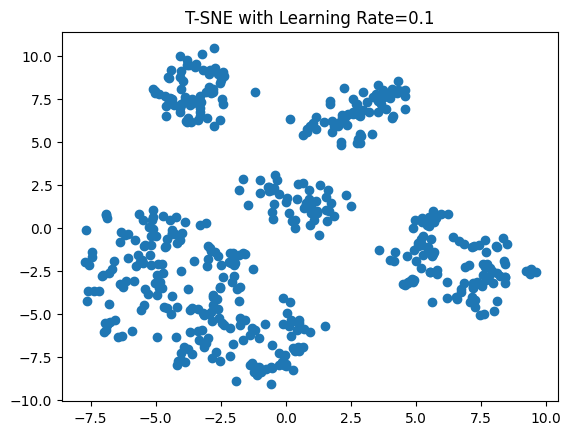

In [49]:
for lr in [0.001, 0.002, 0.05, 0.1]:
    tsne = TSNE(learning_rate=lr)
    data_tsne = tsne.fit_transform(data_50)
    plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
    plt.title(f"T-SNE with Learning Rate={lr}")
    plt.show()

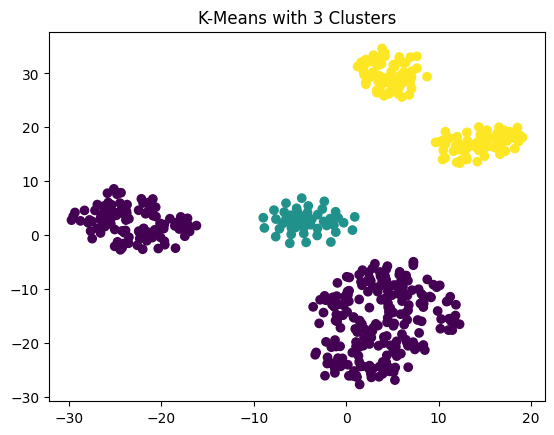

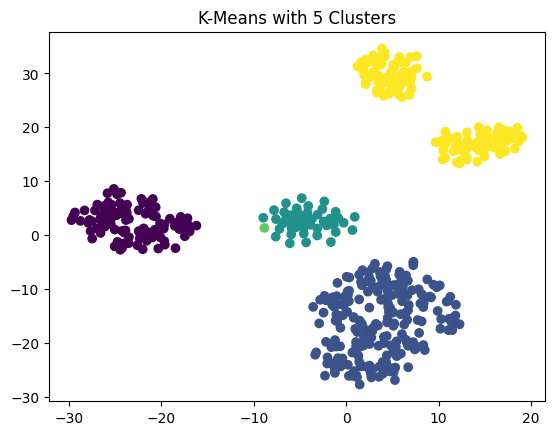

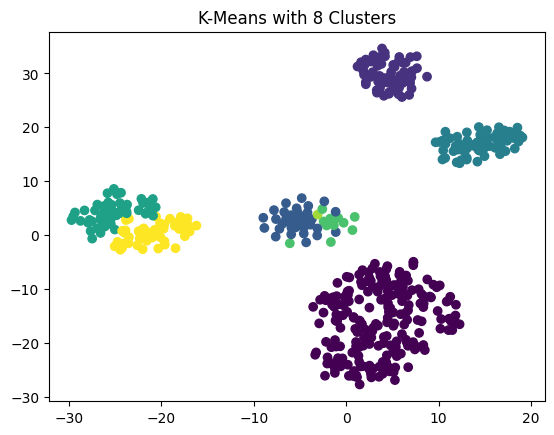

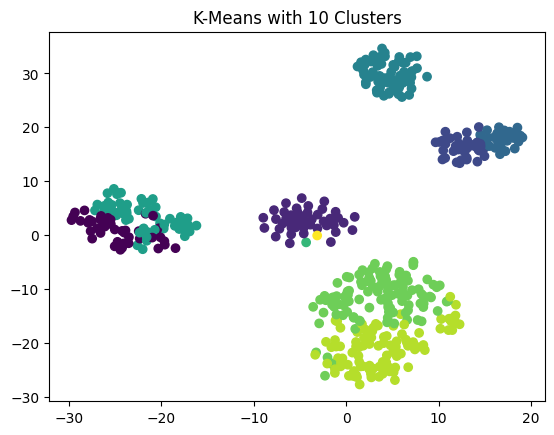

In [50]:
from sklearn.cluster import KMeans

for k in [3, 5, 8, 10]:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(data_50)
    plt.scatter(data_tsne_50[:, 0], data_tsne_50[:, 1], c=cluster_labels)
    plt.title(f"K-Means with {k} Clusters")
    plt.show()